In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

In [171]:
df = pd.read_csv(r'.\Salary_Data.csv')

## Exploring the dataset

In [172]:
df.shape

(6704, 6)

In [173]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [175]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [176]:
df['Gender'].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [177]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6702.0,33.620859,7.614633,21.0,28.0,32.0,38.0,62.0
Years of Experience,6701.0,8.094687,6.059003,0.0,3.0,7.0,12.0,34.0
Salary,6699.0,115326.964771,52786.183911,350.0,70000.0,115000.0,160000.0,250000.0


## Cleaning the dataset

In [178]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

Because the amount of null values is so small they can be filled using (in this case) a median value.

In [179]:
df.fillna(df.median(), inplace=True)

In [180]:
df.isnull().sum()

Age                    0
Gender                 2
Education Level        3
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64

As we can see only the numeric columns can be filled in this way. The rest of the rows with null values will be dropped.

In [181]:
df.dropna(inplace=True)

In [182]:
df.shape

(6701, 6)

Now as we saw the unique values for the column 'Education Level' are duplicated, it needs to be fixed.

In [183]:
mapping_dict = {'Bachelor\'s':'Bachelor\'s Degree',
            'Master\'s':'Master\'s Degree',
            'phD':'PhD'}

df['Education Level'] = df['Education Level'].replace(mapping_dict)


In [184]:
df['Education Level']

0       Bachelor's Degree
1         Master's Degree
2                     PhD
3       Bachelor's Degree
4         Master's Degree
              ...        
6699                  PhD
6700          High School
6701    Bachelor's Degree
6702      Master's Degree
6703          High School
Name: Education Level, Length: 6701, dtype: object

In [185]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


## EDA

### Summary statistics of numerical data

In [186]:
def graph_summary(column, df=df):
    series = df[f'{column}']
    summary_stats = series.describe()

    quartiles = summary_stats[3:]
    sns.barplot(x=quartiles.index, y=quartiles.values)

    mean = summary_stats['mean']
    std = summary_stats['std']

    plt.axhline(mean, color='black', linestyle='--', label='Mean')
    plt.axhline(mean + std, color='blue', linestyle='--', label='Mean + Std')
    plt.axhline(mean - std, color='red', linestyle='--', label='Mean - Std')

    plt.xlabel('Percentile / Summary')
    plt.ylabel('Value')
    plt.title(f'{column} Summary Statistics')

    plt.legend()

    plt.show()

In [187]:
# Age data summary
age_summary = df['Age'].describe().round(2)
age_summary

count    6701.00
mean       33.62
std         7.61
min        21.00
25%        28.00
50%        32.00
75%        38.00
max        62.00
Name: Age, dtype: float64

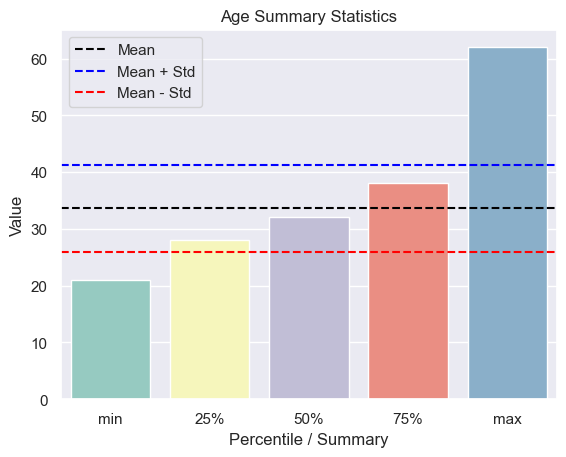

In [188]:
graph_summary('Age')
sns.set_palette("Set3")

In [189]:
# Years of experience data summary
df['Years of Experience'].describe().round(2)

count    6701.00
mean        8.09
std         6.06
min         0.00
25%         3.00
50%         7.00
75%        12.00
max        34.00
Name: Years of Experience, dtype: float64

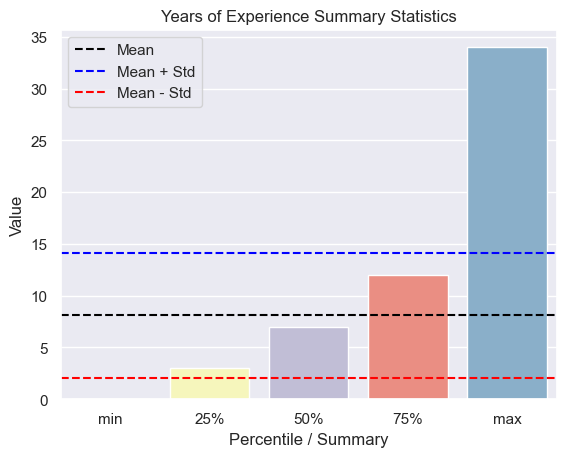

In [190]:
graph_summary('Years of Experience')
sns.set_palette("Set3")

In [191]:
# Salary data summary
df['Salary'].describe().round(2)

count      6701.00
mean     115329.11
std       52777.97
min         350.00
25%       70000.00
50%      115000.00
75%      160000.00
max      250000.00
Name: Salary, dtype: float64

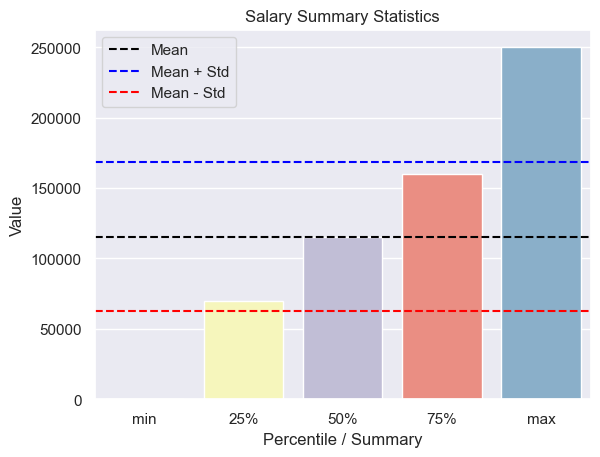

In [192]:
graph_summary('Salary')
sns.set_palette("Set3")

### Gender analysis

In [193]:
# Dataset gender value count

gender_value_count = df['Gender'].value_counts()
gender_value_count

Male      3673
Female    3014
Other       14
Name: Gender, dtype: int64

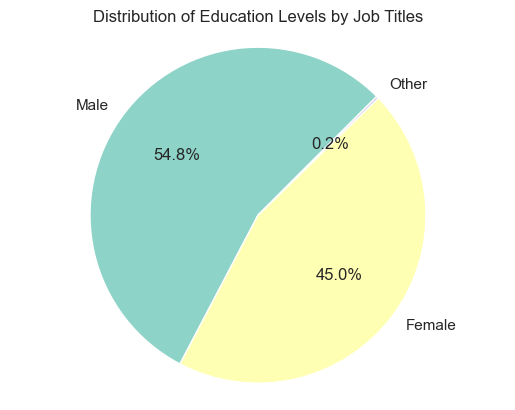

In [234]:
# Dataset gender percentage distribution

gender_distribution = (df['Gender'].value_counts(normalize=True) * 100).round(2)
sns.set_palette("Set3")

labels = gender_distribution.index
sizes = gender_distribution.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)

plt.axis('equal')
plt.title('Distribution of Education Levels by Job Titles')

plt.show()

### Education level analysis

In [195]:
# Education Level value count

edu_value_count = df['Education Level'].value_counts()
edu_value_count

Bachelor's Degree    3023
Master's Degree      1861
PhD                  1369
High School           448
Name: Education Level, dtype: int64

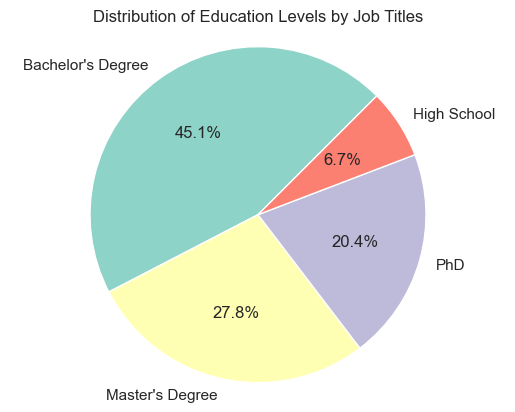

In [237]:
# Education Level distribution

edu_distribution = (df['Education Level'].value_counts(normalize=True) * 100).round(2)
sns.set_palette("Set3")

labels = edu_distribution.index
sizes = edu_distribution.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)

plt.axis('equal')
plt.title('Distribution of Education Levels by Job Titles')

plt.show()

### Job Title analysis

Let's see how many unique job titles are in the dataset

In [197]:
job_titles_unique = len(df['Job Title'].unique())
print(f'Unique job titles: {job_titles_unique}')

Unique job titles: 192


Now which are the top 10 job titles by count

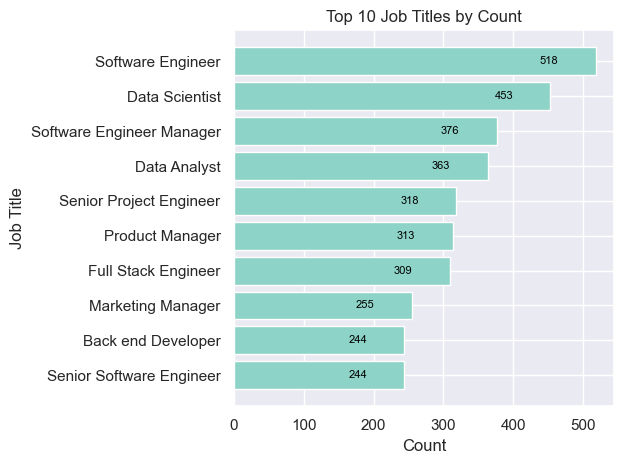

In [247]:
# Top n job titles by count

top_n = 10
top_job_titles = df['Job Title'].value_counts().nlargest(top_n)

plt.barh(top_job_titles.index, top_job_titles.values)

for i, v in enumerate(top_job_titles.values):
    plt.text(v - 80, i, str(v), color='black', ha='left', va='center', fontsize=8)

plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top {} Job Titles by Count'.format(top_n))

plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

Next let's identify the number of times that the word Junior or Senior is included in the Job title.

In [199]:
key_word_counter = {'Junior':0,
                    'Senior':0}

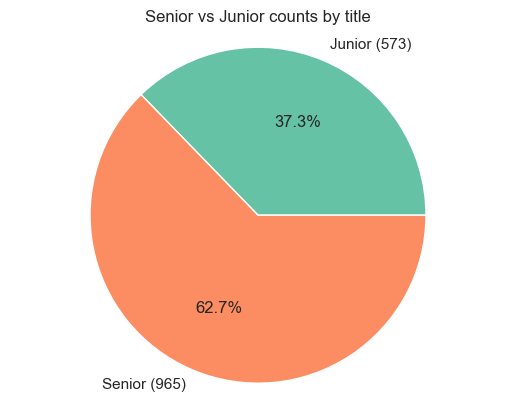

In [220]:

for key in key_word_counter:
    key_word_counter[key] = df['Job Title'].str.contains(key).sum()

jr_sr_count = pd.DataFrame.from_dict(key_word_counter, orient='index', columns=['Counts'])

values = jr_sr_count['Counts'].values
labels = jr_sr_count['Counts'].index
labels = [f"{label} ({count})" for label, count in zip(labels, values)]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Senior vs Junior counts by title')
sns.set_palette("Set3")
plt.show()



Let's do a quick wordcloud graph to visualize the frequency of appearance.

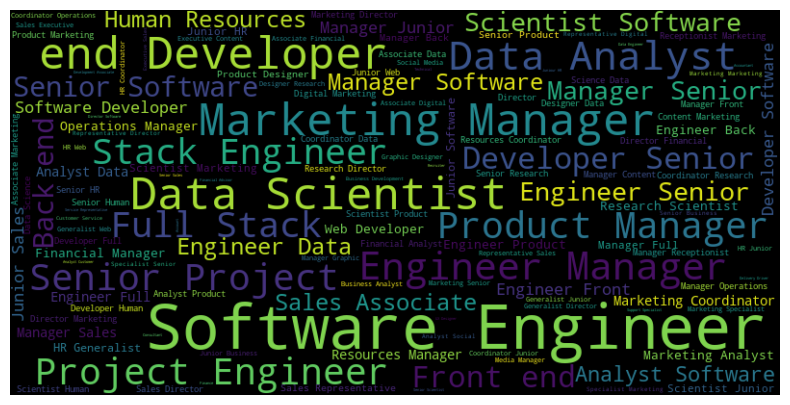

In [201]:
text_data = df['Job Title'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400).generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Now we can take a quick insight into the most common job titles in the data set.

### Correlation analytics

Let's encode the non-numeric columns to do a more in deep correlation analysis

In [202]:
df_encoded = pd.get_dummies(df, columns=['Gender','Education Level','Job Title'], prefix=['gender_','edul_','jobtitle_'])

In [203]:
df_encoded.shape

(6701, 202)

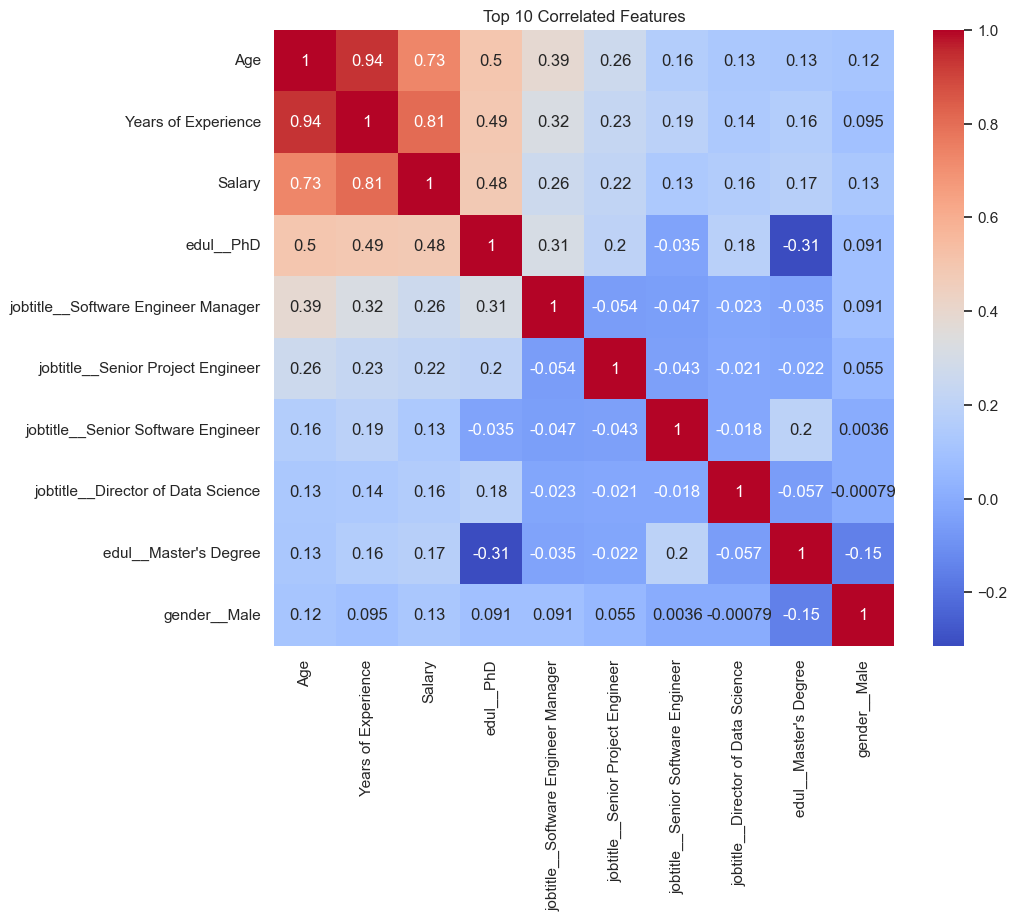

In [232]:
corr_matrix = df_encoded.corr()
num_top_features = 10

# Extract the top correlated features
top_correlations = corr_matrix.nlargest(num_top_features, 'Age')

# Create a subset correlation matrix for the top correlated features
subset_corr_matrix = df_encoded[top_correlations.index].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm')
plt.title(f'Top {num_top_features} Correlated Features')
plt.show()


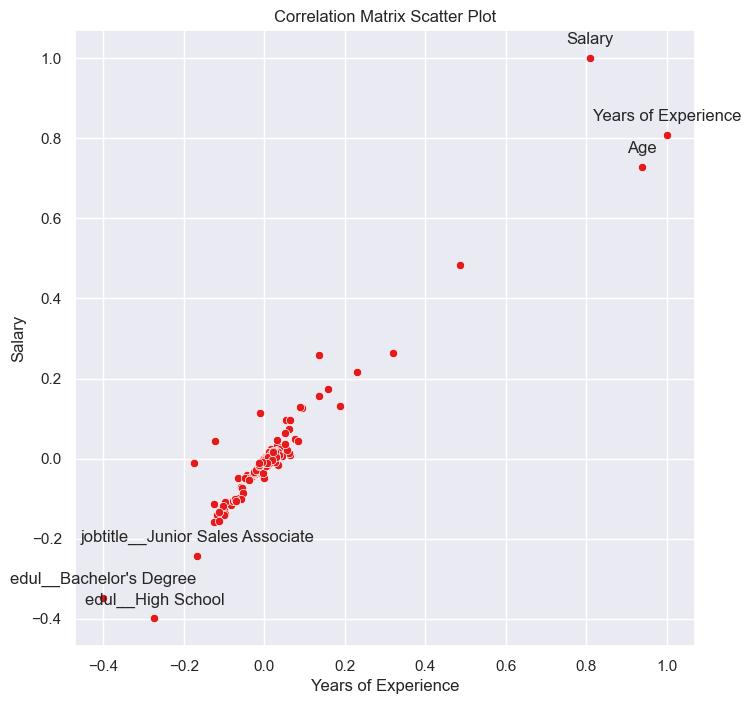

In [226]:
# Scatter plot of the correlation matrix
sns.set(style="darkgrid")
sns.set_palette("Set1")
plt.figure(figsize=(8, 8))
sns.scatterplot(data=corr_matrix, x='Years of Experience', y='Salary')

outliers = corr_matrix[(corr_matrix['Years of Experience'] > 0.6) | (corr_matrix['Years of Experience'] < -0.2) |
              (corr_matrix['Salary'] > 0.6) | (corr_matrix['Salary'] < -0.2)]

for index, row in outliers.iterrows():
    plt.annotate(index, (row['Years of Experience'], row['Salary']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Correlation Matrix Scatter Plot')
plt.show()

In the scatterplot graph, we explore the relationship between Years of Experience and Salary, with Years of Experience as the x-axis and Salary as the y-axis. This visualization allows us to gain insights into the correlation between these two variables. To supplement our understanding, we refer back to the heatmap correlation analysis to examine the correlations of the top features in more detail.

The correlation analysis reveals a significant clustering of non-correlated or weakly correlated features, indicating a lack of strong linear relationships among most variables. However, there are a few standout features that exhibit higher correlations, acting as outliers within the dataset.

Within this subset of highly correlated features, we can identify two distinct groups: positively correlated and negatively correlated variables.

Positively correlated variables include Salary, Years of Experience, and Age. These variables demonstrate a direct positive relationship, indicating that as Salary, Years of Experience, or Age increase, the other variables tend to increase as well.

On the other hand, negatively correlated variables include jobtitle_Junior Sales Associate, edul_Bachelor's Degree, and edul_High School. These variables exhibit an inverse relationship, suggesting that as jobtitle_Junior Sales Associate or the educational levels of Bachelor's Degree or High School are present, the other variables may decrease.

### Salary by job title

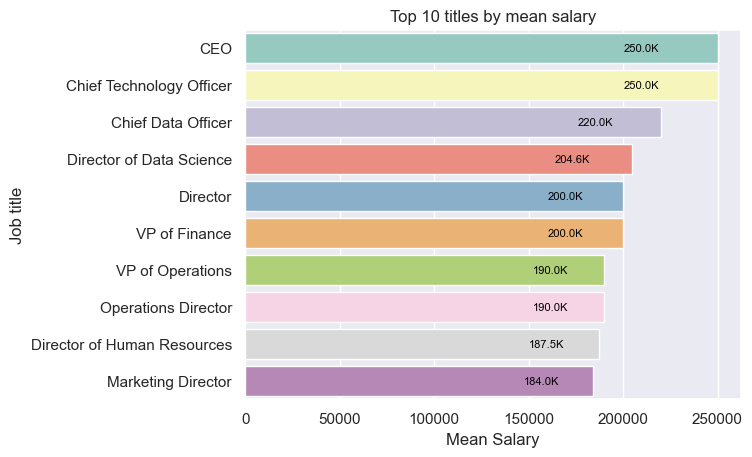

In [206]:
salary_by_job_title = df.groupby('Job Title')['Salary'].mean().round(2)
top_10_salaries = salary_by_job_title.sort_values(ascending=False).head(10)

sns.set(style='darkgrid')
sns.set_palette("Set3")
ax = sns.barplot(x=top_10_salaries.values, y=top_10_salaries.index)

max_value = top_10_salaries.max()
for i, v in enumerate(top_10_salaries.values):
    if v > 1000:
        v = v / 1000
        annotation = f'{v:.1f}K'
    else:
        annotation = str(v)

    offset_percentage = (v / max_value) * 800
    
    ax.text(v + (max_value * offset_percentage), i, annotation, color='black', ha='left', va='center', fontsize=8)

plt.xlabel('Mean Salary')
plt.ylabel('Job title')
plt.title('Top 10 titles by mean salary')

plt.show()

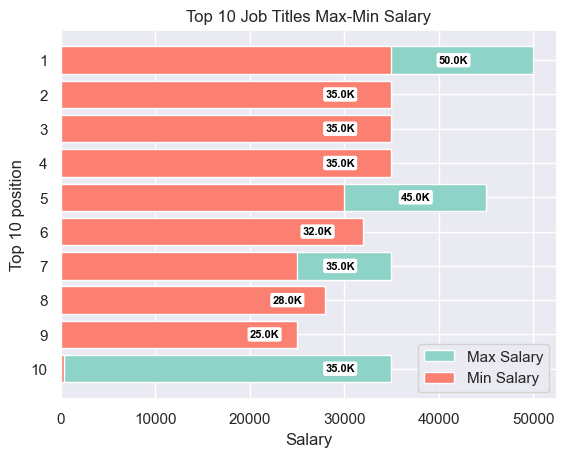

In [227]:
salary_stats = df.groupby('Job Title')['Salary'].agg(['mean', 'max', 'min'])

top_10_salaries = salary_stats.sort_values(by='mean', ascending=True).head(10)
plt.barh(top_10_salaries.index, top_10_salaries['max'], color='#8dd3c7', label='Max Salary')
plt.barh(top_10_salaries.index, top_10_salaries['min'], color='#fb8072', label='Min Salary')

plt.legend()

max_values = top_10_salaries['max'].max()
offset_percentage = -0.2  # Adjust the offset percentage

for i, (v, bar) in enumerate(zip(top_10_salaries['max'], plt.gca().patches)):
    if v > 1000:
        v = v / 1000
        annotation = f'{v:.1f}K'
    else:
        annotation = str(v)
        
    offset = bar.get_width() * offset_percentage
    plt.text(bar.get_width() + offset, bar.get_y() + bar.get_height() / 2, annotation, color='black', ha='left',
             va='center', fontsize=8, weight='bold',
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

tick_positions = range(0, len(top_10_salaries))
tick_labels = [str(len(tick_positions)-i) for i in tick_positions]
plt.yticks(tick_positions, tick_labels)

plt.xlabel('Salary')
plt.ylabel('Top 10 position')
plt.title('Top 10 Job Titles Max-Min Salary')

plt.show()

The analysis reveals that the highest-earning positions are predominantly occupied by executives in the C-suite. This highlights the significant impact of leadership roles on salary levels. Additionally, the Director of Data Science emerges as a prominent job title within the top earners, reflecting the high demand for professionals skilled in data science in today's rapidly evolving technological landscape. Furthermore, the remaining positions in the top ten comprise traditional high-earning positions like Vice Presidents (VPs) and Directors across various departments. This emphasizes the importance of senior management and specialized expertise in driving higher salaries within organizations. Overall, this observation underscores the significance of leadership, expertise, and specialized skills in attaining top-level earning positions.

### Salary by Education Level

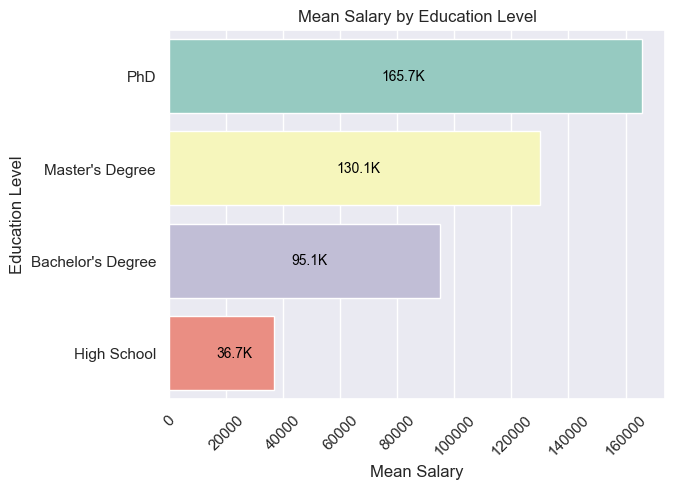

In [208]:
salary_by_edul = df.groupby('Education Level')['Salary'].mean().round(2)
edul_sort = salary_by_edul.sort_values(ascending=False).head(10)

sns.set(style='darkgrid')
sns.set_palette("Set3")
ax = sns.barplot(x=edul_sort.values, y=edul_sort.index)

max_values = edul_sort.values.max()
offset_percentage = -0.55  # Adjust the offset percentage

for i, (v, bar) in enumerate(zip(edul_sort.values, ax.patches)):
    if v > 1000:
        v = v / 1000
        annotation = f'{v:.1f}K'
    else:
        annotation = str(v)
        
    offset = bar.get_width() * offset_percentage
    ax.text(bar.get_width() + offset, bar.get_y() + bar.get_height() / 2, annotation, color='black', ha='left',
            va='center', fontsize=10)

plt.xlabel('Mean Salary')
plt.xticks(rotation=45)
plt.ylabel('Education Level')
plt.title('Mean Salary by Education Level')

plt.show()


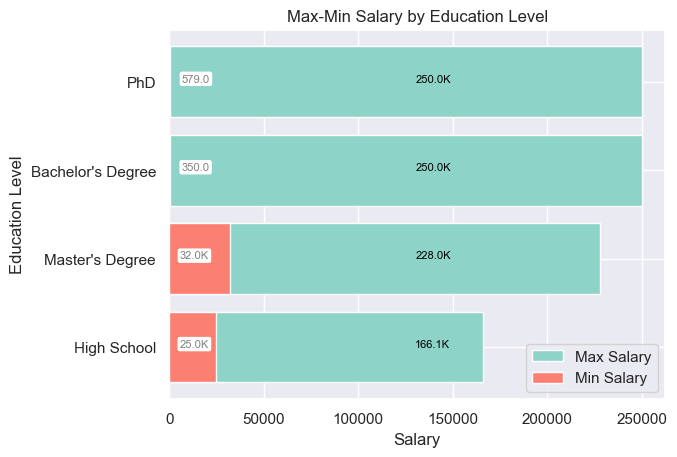

In [228]:
salary_stats = df.groupby('Education Level')['Salary'].agg(['mean', 'max', 'min'])

edul_sort = salary_stats.sort_values(by='max', ascending=True).head(10)

plt.barh(edul_sort.index, edul_sort['max'], color='#8dd3c7', label='Max Salary')
plt.barh(edul_sort.index, edul_sort['min'], color='#fb8072', label='Min Salary')

for i, v in enumerate(edul_sort['max']):
    if v > 1000:
        v = v / 1000
        plt.text(v+130000, i, f'{v:.1f}K', color='black', ha='left', fontsize=8)
    else:
        plt.text(v+130000, i, str(v), color='black', ha='left', fontsize=8)

for i, v in enumerate(edul_sort['min']):
    if v > 1000:
        v = v / 1000
        plt.text(v+21000, i, f'{v:.1f}K', color='grey', ha='right', fontsize=8, bbox=dict(facecolor='white', edgecolor='none',
                      boxstyle='round,pad=0.2'))
    else:
        plt.text(v+21000, i, str(v), color='grey', ha='right', fontsize=8, bbox=dict(facecolor='white', edgecolor='none',
                      boxstyle='round,pad=0.2'))

plt.legend()
plt.xlabel('Salary')
plt.ylabel('Education Level')
plt.title('Max-Min Salary by Education Level')

plt.show()

In general, we observe that a higher education level tends to correspond to higher salaries. However, it is important to note that the relationship between education level and salary varies across different job titles and professions. Simply having a higher education level does not guarantee a higher salary compared to individuals with lower education levels in different job titles or professions. Other factors, such as job responsibilities, experience, and industry demand, also play a significant role in determining salary levels. Therefore, it is essential to consider various factors beyond education when analyzing salary trends across different job titles.

### Experience by Age

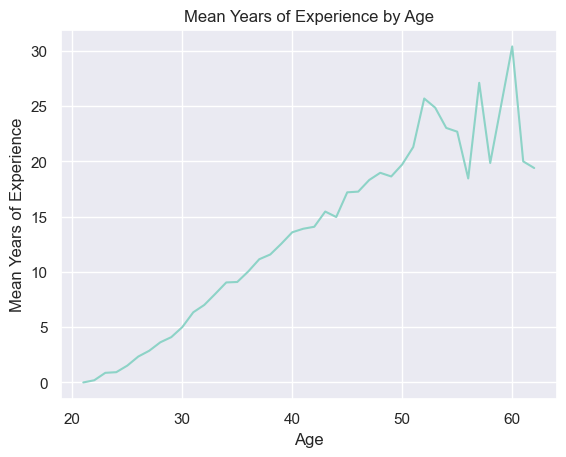

In [229]:
mean_experience_by_age = df.groupby('Age')['Years of Experience'].mean()
sns.set_palette("Set3")

fig, ax = plt.subplots()
ax.plot(mean_experience_by_age.index, mean_experience_by_age.values)

ax.set_xlabel('Age')
ax.set_ylabel('Mean Years of Experience')
ax.set_title('Mean Years of Experience by Age')

plt.show()

As anticipated, there exists a discernible upward trend when examining the correlation between years of experience and age. It is customary for individuals to accumulate expertise as they advance in age and progress in their respective careers. However, intriguingly, there are notable fluctuations—sharp drops and spikes—once individuals reach the age of 50 and beyond. This phenomenon can be attributed to a multitude of factors that come into play during this stage of one's professional journey. Factors such as: retirement, career change, skill relevance, health and personal factors and career breaks.

### Educaction Level by Job title

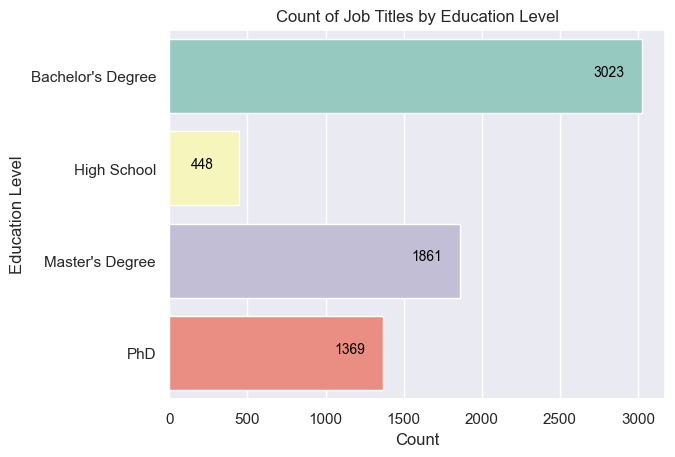

In [230]:
edul_by_job_title = df.groupby('Education Level')['Job Title'].count()
sns.set(style='darkgrid')
sns.set_palette("Set3")

ax = sns.barplot(x=edul_by_job_title.values, y=edul_by_job_title.index)

for i, v in enumerate(edul_by_job_title.values):
    ax.text(v - 310, i, str(v), color='black', ha='left', fontsize=10)

plt.xlabel('Count')
plt.ylabel('Education Level')
plt.title('Count of Job Titles by Education Level')

plt.show()

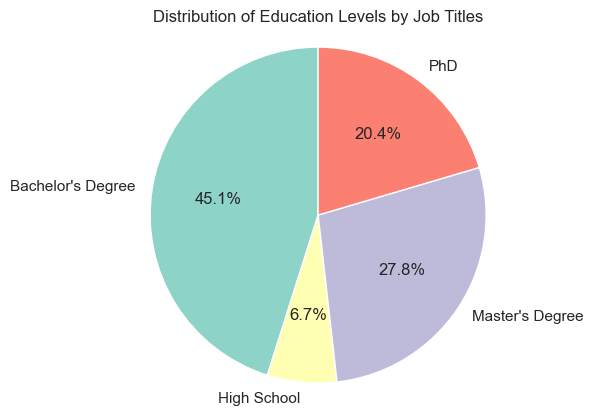

In [231]:
edul_by_job_title = df.groupby('Education Level')['Job Title'].count()
sns.set_palette("Set3")

labels = edul_by_job_title.index
sizes = edul_by_job_title.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Distribution of Education Levels by Job Titles')

plt.show()

In the professional labor market, it is expected to see a larger number of graduates holding a bachelor's degree compared to higher levels of education. This trend aligns with the investment of time, resources, and increased difficulty associated with pursuing advanced degrees. Notably, the distribution of education levels shows a clear downward trend, indicating that the number of individuals with higher education decreases as the level of education increases. However, there is an exception to this trend with individuals having only a high school education, which represents the smallest group. This highlights that to access the specialized labor market, it is crucial to possess at least a degree-level qualification.